# RBF 

In [1]:
import numpy as np
import sklearn.cluster as cl
import sklearn.metrics as met
import matplotlib.pyplot as plt
import sklearn.preprocessing as pp

###### fixing "random state" and then changing the plot's style to "ggplot"

In [2]:
np.random.seed(0)
plt.style.use('ggplot')

###### مشخص کردن تعداد داده‌ها و مراکز دسته‌ها برای ایجاد مجموعه داده

In [3]:
nD = 200 # Data Size
M = np.array([[0, 0], [1, 0.6], [0.6, 0.9]]) # Clusters Center
S = 0.2 # Distribution Variance

###### تعیین تعداد ویژگی‌ها و کلاس‌ها برای ایجاد مجموعه داده

In [4]:
nC, nX = M.shape

###### ایجاد ماتریس‌هایی خالی را برای ذخیره‌سازی داده‌ها

In [5]:
X = np.zeros((nD, nX))
Y = np.zeros((nD, 1))

###### تولید و ذخیره‌سازی داده‌ها

In [6]:
# Creating Dataset
for i in range(nD):
    c = np.random.randint(nC)
    X[i, :] = M[c] + S*np.random.randn(nX)
    Y[i, 0] = c

###### One_Hot

In [7]:
# One-Hot Encoding Labels
# ?
OHE = pp.OneHotEncoder()
OHY = OHE.fit_transform(Y).toarray()

###### مصورسازی مجموعه داده تولیدی برای پیاده‌سازی شبکه شعاعی

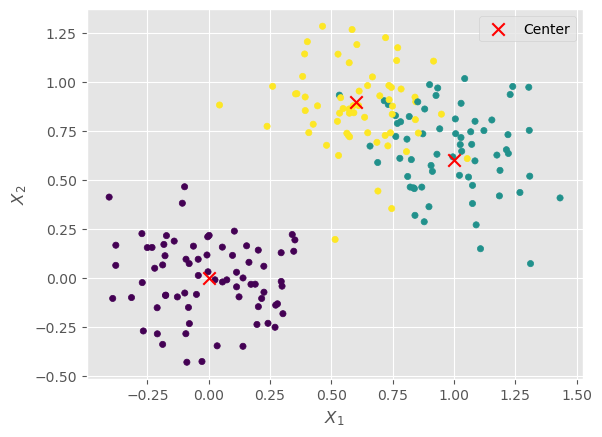

In [8]:
# Visualizing Created Data
# ?
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], s=20, marker='o')
plt.scatter(M[:, 0], M[:, 1], c='r', s=80, marker='x', label='Center')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.show()

###### پیاده‌سازی شبکه عصبی شعاعی

In [9]:
class RBF:
    def __init__ (self, name:str):
        self.name = name
        
#   تعیین مراکز نورونها
    def fit_centers (self, X:np.ndarray):
#         chera nH?
        self.KMN = cl.KMeans(n_clusters=self.nH)
        self.KMN.fit(X)
        self.C = self.KMN.cluster_centers_
        
    def fit (self, X:np.ndarray, Y:np.ndarray, nH:int, nEpoch:int=100, lr:float=1e-2):
        self.nX = X.shape[1]
        self.nY = Y.shape[1]
        self.nH = nH
        self.nEpoch = nEpoch
        self.lr = lr
        self.fit_centers(X)
        self.fit_wb(X, Y)
    
#   بایاس های لایه آخر
    def fit_wb (self, X:np.ndarray, Y:np.ndarray):
        D = self.get_distances(X)
#       first layer's output
        O1 = self.bf(D)
#       مقداردهی اولیه وزنها و بایاسها
        self.W = np.random.uniform(-1, +1, (self.nH, self.nY))
        self.B = np.random.uniform(-1, +1, (self.nY))
        self.history = {'loss':[], 'accuracy':[]}
        O2 = self.model(O1)
        E = round(met.mean_squared_error(Y, O2), 4)
        A = round(self.accuracy(Y, O2), 4)
        self.history['loss'].append(E)
        self.history['accuracy'].append(A)
        print(f'Epoch: {0} -- Loss: {round(met.mean_squared_error(Y, O2), 4)}')
        for I in range(self.nEpoch):
            for x, y in zip(O1, Y):
#               updating weights
                for i in range(self.nH):
                    for j in range(self.nY):
                        o = self.model(x)
                        e = y[j] - o[j]
                        d = (o[j] * (1 - o[j]))
                        self.W[i, j] += self.lr * x[i] * e * d
#               updating biases
                for j in range(self.nY):
                    o = self.model(x)
                    e = y[j] - o[j]
                    d = (o[j] * (1 - o[j]))
                    self.B[j] += self.lr * e * d
#           برای اطلاع از شرایط لحظه ای مدل
            O2 = self.model(O1)
            E = round(met.mean_squared_error(Y, O2), 4)
            A = round(self.accuracy(Y, O2), 4)
            self.history['loss'].append(E)
            self.history['accuracy'].append(A)
            print(f'Epoch: {I+1} -- Loss: {E} -- Accuracy: {A}')
            
    def get_distances (self, X:np.ndarray):
        N = X.shape[0]
        D = np.zeros((N, self.nH))
        for i in range(N):
            for j in range(self.nH):
                D[i, j] = np.linalg.norm(X[i] - self.C[j], ord=2)
        return D
    
#   گاوس  
    def bf (self, D:np.ndarray, a:float=10):
        return np.exp(-a*np.power(D, 2))
    
    def model (self, X:np.ndarray):
        Z = np.dot(X, self.W) + self.B
        O = 1/(1 + np.exp(-Z))
        return O
    
    def accuracy (self, Y:np.ndarray, O:np.ndarray):
        N = Y.shape[0]
        a = 0
        for i in range(N):
            if np.argmax(Y[i, :]) == np.argmax(O[i, :]):
                a += 1
        return a/N
    
    def predict (self, X:np.ndarray):
        D = self.get_distances(X)
        O1 = self.bf(D)
        O2 = self.model(O1)
        return np.argmax(O2, axis=1).reshape((-1, 1))

In [10]:
Model = RBF('My First RBF')

Model.fit(X, OHY, 3, nEpoch=50, lr=1e-3)

Epoch: 0 -- Loss: 0.2108
Epoch: 1 -- Loss: 0.2104 -- Accuracy: 0.58
Epoch: 2 -- Loss: 0.2101 -- Accuracy: 0.595
Epoch: 3 -- Loss: 0.2097 -- Accuracy: 0.595
Epoch: 4 -- Loss: 0.2093 -- Accuracy: 0.6
Epoch: 5 -- Loss: 0.2089 -- Accuracy: 0.6
Epoch: 6 -- Loss: 0.2086 -- Accuracy: 0.6
Epoch: 7 -- Loss: 0.2082 -- Accuracy: 0.605
Epoch: 8 -- Loss: 0.2078 -- Accuracy: 0.605
Epoch: 9 -- Loss: 0.2074 -- Accuracy: 0.61
Epoch: 10 -- Loss: 0.2071 -- Accuracy: 0.61
Epoch: 11 -- Loss: 0.2067 -- Accuracy: 0.61
Epoch: 12 -- Loss: 0.2063 -- Accuracy: 0.615
Epoch: 13 -- Loss: 0.206 -- Accuracy: 0.615
Epoch: 14 -- Loss: 0.2056 -- Accuracy: 0.615
Epoch: 15 -- Loss: 0.2052 -- Accuracy: 0.615
Epoch: 16 -- Loss: 0.2048 -- Accuracy: 0.625
Epoch: 17 -- Loss: 0.2045 -- Accuracy: 0.625
Epoch: 18 -- Loss: 0.2041 -- Accuracy: 0.625
Epoch: 19 -- Loss: 0.2038 -- Accuracy: 0.63
Epoch: 20 -- Loss: 0.2034 -- Accuracy: 0.63
Epoch: 21 -- Loss: 0.203 -- Accuracy: 0.635
Epoch: 22 -- Loss: 0.2027 -- Accuracy: 0.64
Epoch: 23

In [11]:
print(Y[:10])

print(Model.predict(X)[:10])

[[0.]
 [1.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [2.]
 [1.]
 [0.]]
[[0]
 [2]
 [2]
 [1]
 [0]
 [0]
 [0]
 [2]
 [1]
 [0]]


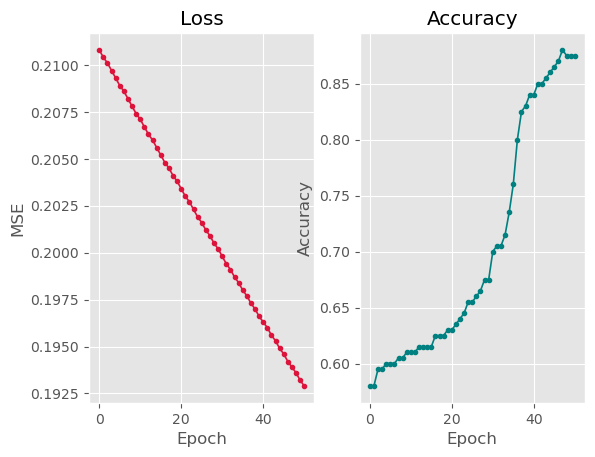

In [12]:
Losses = Model.history['loss']
Accuracies = Model.history['accuracy']

plt.subplot(1, 2, 1)
plt.plot(Losses, lw=1.2, c='crimson', marker='o', ms=3)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(Accuracies, lw=1.2, c='teal', marker='o', ms=3)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

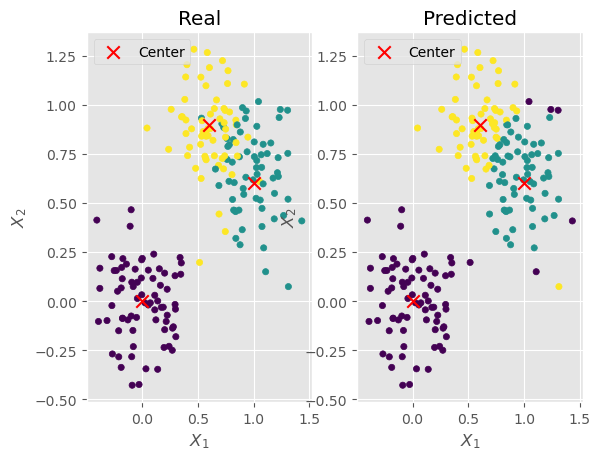

In [13]:
O = Model.predict(X)

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], s=20, marker='o')
plt.scatter(M[:, 0], M[:, 1], c='r', s=80, marker='x', label='Center')
plt.title('Real')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=O[:, 0], s=20, marker='o')
plt.scatter(M[:, 0], M[:, 1], c='r', s=80, marker='x', label='Center')
plt.title('Predicted')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()

plt.savefig('5.png',dpi=300)